In [22]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in c:\users\ahunt\anaconda3\envs\pythondata\lib\site-packages (0.11.1)


In [24]:
import pandas as pd

In [25]:
#Read the CSV file into a pandas DataFrame 
MMR_race = pd.read_csv("../Resources/race_data.csv")
MMR_race

,state,state_code,year,race,hispanic_origin,births_by_race,deaths_by_race,mmr_by_race,population_by_race,id,state_abbv,latitude,longitude
0,Alabama,1,2016,Black or African American,Not Hispanic or Latino,17989,14,77.83,0,US.AL,AL,32.318231,-86.902298
1,Alabama,1,2016,White,Not Hispanic or Latino,35319,18,50.96,0,US.AL,AL,32.318231,-86.902298
2,Alabama,1,2017,Black or African American,Not Hispanic or Latino,18354,25,136.21,704201,US.AL,AL,32.318231,-86.902298
3,Alabama,1,2017,White,Not Hispanic or Latino,34784,15,43.12,1655605,US.AL,AL,32.318231,-86.902298
4,Alabama,1,2018,Black or African American,Not Hispanic or Latino,17939,14,78.04,706754,US.AL,AL,32.318231,-86.902298
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,West Virginia,54,2018,White,Not Hispanic or Latino,16785,10,59.58,853052,US.WV,WV,38.597626,-80.454903
384,Wisconsin,55,2009,White,Not Hispanic or Latino,52462,10,19.06,0,US.WI,WI,43.784440,-88.787868
385,Wisconsin,55,2011,White,Not Hispanic or Latino,50500,10,19.80,0,US.WI,WI,43.784440,-88.787868
386,Wisconsin,55,2014,White,Not Hispanic or Latino,49440,13,26.29,2409803,US.WI,WI,43.784440,-88.787868


In [26]:
MMR_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               388 non-null    object 
 1   state_code          388 non-null    int64  
 2   year                388 non-null    int64  
 3   race                388 non-null    object 
 4   hispanic_origin     388 non-null    object 
 5   births_by_race      388 non-null    int64  
 6   deaths_by_race      388 non-null    int64  
 7   mmr_by_race         388 non-null    float64
 8   population_by_race  388 non-null    int64  
 9   id                  388 non-null    object 
 10  state_abbv          388 non-null    object 
 11  latitude            388 non-null    float64
 12  longitude           388 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 39.5+ KB


In [27]:
MMR_race.corr()

,state_code,year,births_by_race,deaths_by_race,mmr_by_race,population_by_race,latitude,longitude
state_code,1.000000,-0.003414,-0.064594,0.076853,0.060864,0.030284,0.268065,0.303500
year,-0.003414,1.000000,-0.110851,-0.078901,0.051548,0.362474,-0.053729,-0.001945
births_by_race,-0.064594,-0.110851,1.000000,0.526657,-0.562631,0.431093,-0.085820,-0.383920
deaths_by_race,0.076853,-0.078901,0.526657,1.000000,0.175630,0.172267,-0.343356,-0.153124
mmr_by_race,0.060864,0.051548,-0.562631,0.175630,1.000000,-0.360120,-0.151142,0.216478
population_by_race,0.030284,0.362474,0.431093,0.172267,-0.360120,1.000000,0.037722,-0.115487
latitude,0.268065,-0.053729,-0.085820,-0.343356,-0.151142,0.037722,1.000000,0.135233
longitude,0.303500,-0.001945,-0.383920,-0.153124,0.216478,-0.115487,0.135233,1.000000


In [28]:
# Selecting the features from the dataframe that will be the X values
selected_features = MMR_race[['race', 'hispanic_origin', 'births_by_race', 'deaths_by_race', 'births_by_race', 'mmr_by_race', 'population_by_race']]
selected_features.head()

,race,hispanic_origin,births_by_race,deaths_by_race,births_by_race,mmr_by_race,population_by_race
0,Black or African American,Not Hispanic or Latino,17989,14,17989,77.83,0
1,White,Not Hispanic or Latino,35319,18,35319,50.96,0
2,Black or African American,Not Hispanic or Latino,18354,25,18354,136.21,704201
3,White,Not Hispanic or Latino,34784,15,34784,43.12,1655605
4,Black or African American,Not Hispanic or Latino,17939,14,17939,78.04,706754


AttributeError: module 'seaborn' has no attribute 'set_theme'

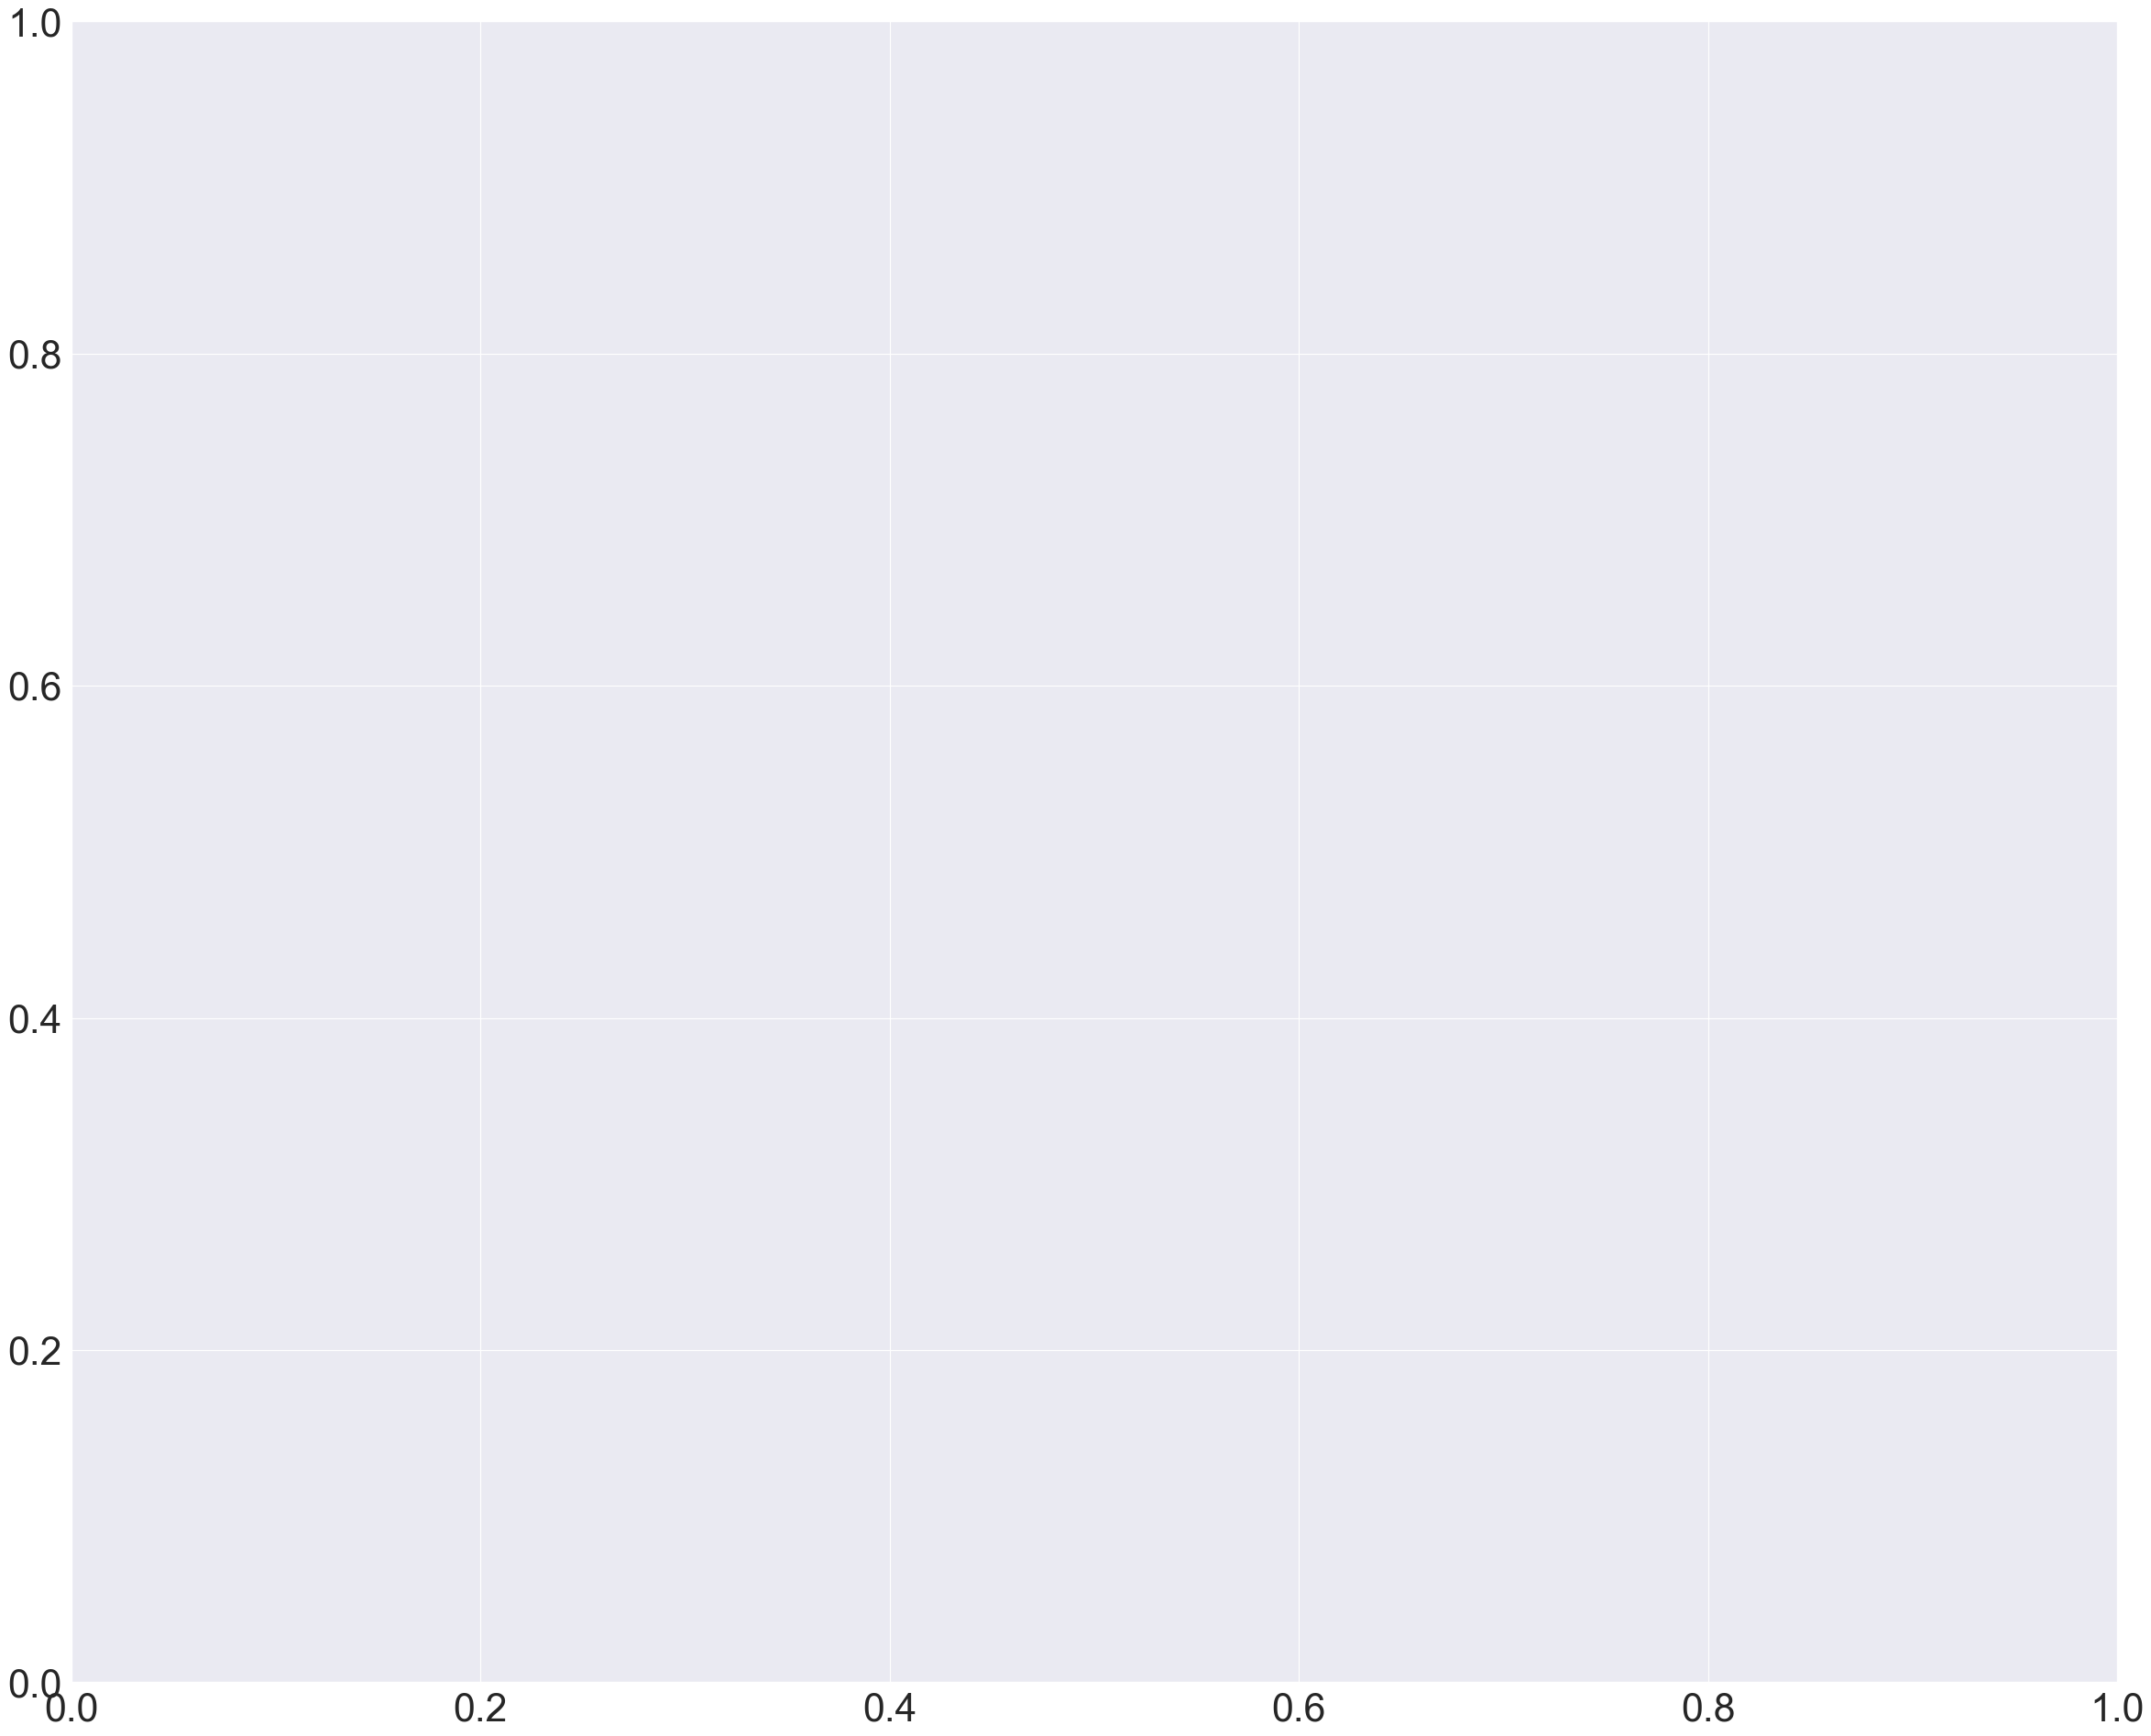

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Using the figure, axes together using `plt.subplots()` function:
fig, ax = plt.subplots(figsize=(36, 30), dpi=80, facecolor='w', edgecolor='k')

# Calculating the correlation matrix for each features in dataset 
corr = selected_features.dropna().corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Want diagonal elements as well
mask[np.diag_indices_from(mask)] = False

# Setting features
top_corr_features = corr.index
sns.set(font_scale=3.5)
sns.set_theme(context = "paper", style="ticks", font_scale=1.8)


# Adjusting the x & y ticks and adding title
ax.set(title="Maternal Maternity Ratio Heatmap Correlation")
plt.title("Maternal Maternity Ratio Heatmap Correlation", fontsize = 30, fontweight='bold')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


# Plotting the heatmap
sns.heatmap(corr[top_corr_features], mask=mask, 
            cmap=sns.diverging_palette(220, 10, sep=50, as_cmap=True),
            square=True, annot=True, ax=ax, fmt='.2f', linewidths=1, linecolor='white', 
            cbar_kws={"shrink": .95, "extend":'both'})

plt.savefig('../../static/img/heatmap_non_race.png')

plt.show()

In [12]:
# Use Pandas get_dummies to convert categorical data

selected_features_transformed = pd.get_dummies(selected_features)
selected_features_transformed.head()

,births_by_race,deaths_by_race,births_by_race,mmr_by_race,population_by_race,race_Asian or Pacific Islander,race_Black or African American,race_White,hispanic_origin_Hispanic or Latino,hispanic_origin_Not Hispanic or Latino
0,17989,14,17989,77.83,0,0,1,0,0,1
1,35319,18,35319,50.96,0,0,0,1,0,1
2,18354,25,18354,136.21,704201,0,1,0,0,1
3,34784,15,34784,43.12,1655605,0,0,1,0,1
4,17939,14,17939,78.04,706754,0,1,0,0,1


In [13]:
# Selecting and assigning the X & y values

X = selected_features_transformed.drop(columns=['mmr_by_race'], axis=1)
y = MMR_race['mmr_by_race'].values.reshape(-1, 1)

In [14]:
# Print the selecting X & y shapes
print('Shape:', X.shape, y.shape)

Shape: (388, 9) (388, 1)


In [15]:
# Spliting our data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [16]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [17]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [18]:
# LASSO model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from numpy import arange

# Note: Use an alpha of .01 when creating the model for this activity
lasso = Lasso(alpha=0.01).fit(X_train_scaled, y_train_scaled)
predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
lasso.coef_

MSE: 0.37423933822621347, R2: 0.6956802323292564


array([-2.99282440e-01,  4.57481902e-01, -2.53332706e-01, -0.00000000e+00,
       -6.81479397e-03,  5.02888864e-01, -0.00000000e+00,  3.95125329e-02,
       -9.83223343e-18])

In [19]:
# define model
model = Lasso()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)

# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(X_train_scaled, y_train_scaled)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.296
Config: {'alpha': 0.01}


In [20]:
predictions_grid = results.predict(X_test_scaled)

MSE_grid = mean_squared_error(y_test_scaled, predictions_grid)
r2_grid = results.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE_grid}, R2: {r2_grid}")

MSE: 0.37423933822621347, R2: -0.35317979421876394
